In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


10:22:08: Started 


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
S&P 500,35.0,0.174058,0.148871,-0.221449,0.106123,0.205965,0.263270,0.381820,1.115871,5.191799,1.879680,-1.034946
IRA,35.0,0.285011,0.333036,-0.651938,0.200614,0.293833,0.492404,0.893232,0.831967,9.457423,4.030461,-0.939383
M1,35.0,0.098158,0.135264,-0.265972,0.053463,0.143427,0.173859,0.300914,0.667004,2.221706,2.002450,-1.152153
Alibaba,35.0,0.324925,0.479710,-0.913795,0.085054,0.447441,0.613528,1.260611,0.660792,9.784285,7.258763,-0.718892
CSI 300,35.0,0.208146,0.528540,-1.218940,-0.052003,0.313690,0.566308,1.100337,0.378798,3.196060,7.318648,-0.936636


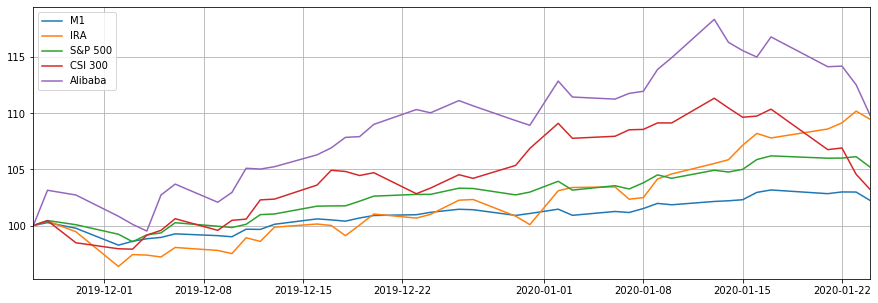

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 50)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 50)})
data = DataReader(['SPY', 'ASHR', 'BABA'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
    'Alibaba': data['BABA'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

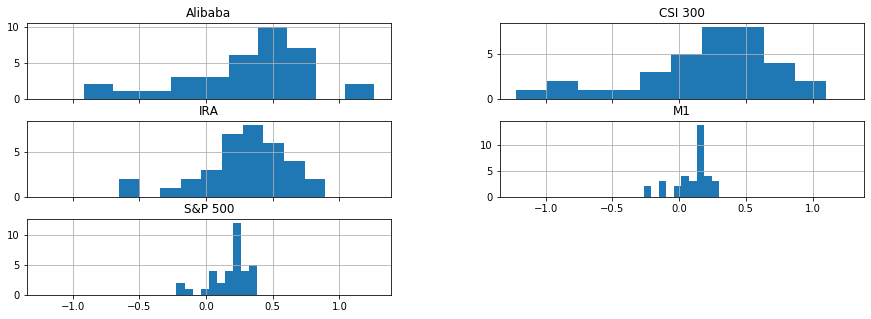

In [3]:
ret = frame.rolling(5).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(3, 2))